In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### No missing values !

In [5]:
classes = iris['variety'].unique()
print(classes)

['Setosa' 'Versicolor' 'Virginica']


In [6]:
for variety in classes:
    print("{} - {}".format(variety,iris[iris['variety'] == variety]['variety'].count()))

Setosa - 50
Versicolor - 50
Virginica - 50


#### This shows that data is uniformly distributed across all classes

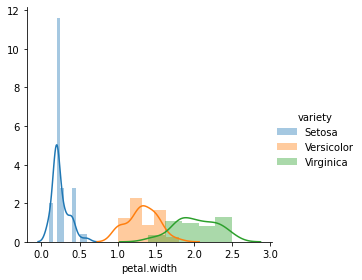

In [7]:
sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"petal.width") \
    .add_legend();

plt.show();

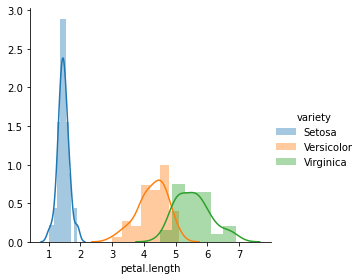

In [8]:

sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"petal.length") \
    .add_legend();

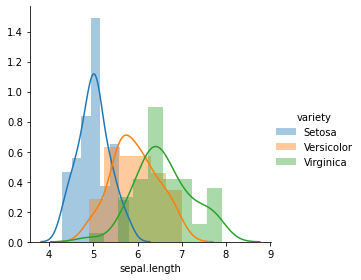

In [9]:
sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"sepal.length") \
    .add_legend();

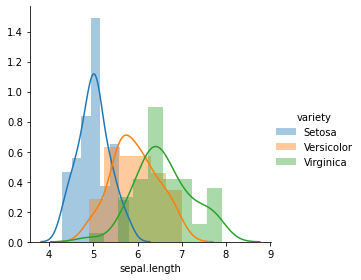

In [10]:
sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"sepal.length") \
    .add_legend();

#### The above plots show that petal width and petal length is apt for classification as sepal length and sepal width demonstrate overlap.

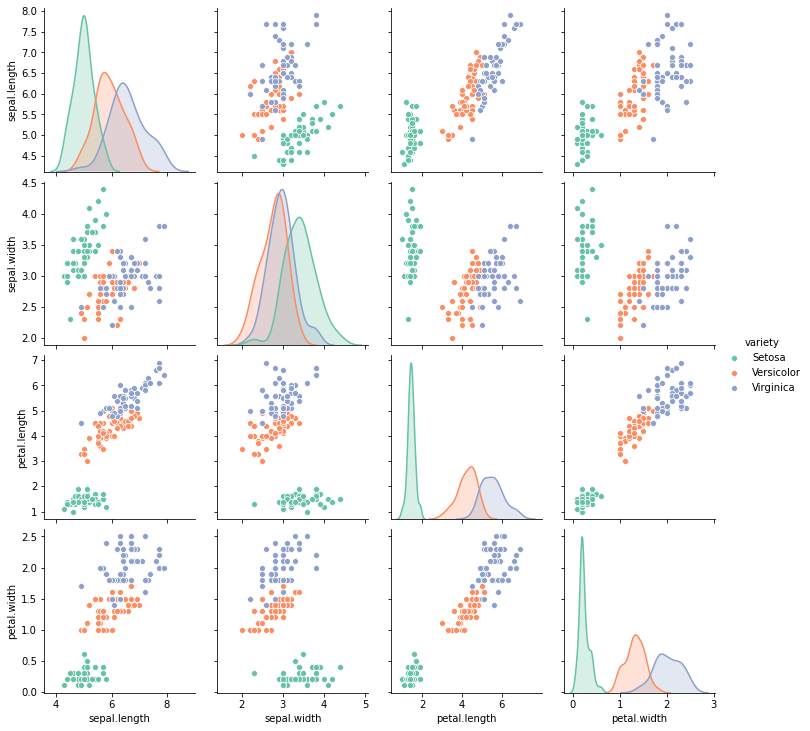

In [11]:
sns.pairplot(data=iris, hue='variety', palette='Set2')


#### This shows that Petal width and Petal length might be good features for classification. Also, as can be seen, Setosa is quite easily separable while the other two classes have some overlap

In [12]:
y = iris['variety']
X = iris.drop('variety',axis=1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2, random_state=42)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [14]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


In [22]:
from sklearn.svm import SVC

model = SVC(C=4.0, degree=3,decision_function_shape="ovr")
model.fit(X_train,y_train)


print('Accuracy on training data: {:.2f}'.format(model.score(X_train, y_train) * 100))
pred = model.predict(X_test)

Accuracy on training data: 99.17


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate = 0.1)
xgb_model.fit(X_train, y_train)

print('Accuracy on training data: {:.2f}'.format(xgb_model.score(X_train, y_train)*100))
print('Accuracy on test data: {}'.format(xgb_model.score(X_test, y_test)*100))

xgb_pred = xgb_model.predict(X_test)

Accuracy on training data: 100.00
Accuracy on test data: 100.0
